In [160]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv("NN5_FINAL_DATASET_TRAIN.csv")
test =  pd.read_csv("NN5_FINAL_DATASET_TEST.csv")

In [162]:
df = df[df['name'] == 'NN5-019'].reset_index()
df = df.drop(['index'], axis = 1)
test = test[test['name'] == 'NN5-019'].reset_index()
test = test.drop(['index'], axis = 1)

In [163]:
y = df.drop(df.index[:120]).reset_index()
y = y['value']


In [164]:
d = {'120': [], 'prev1': [],'prev2': [],'prev3': [],'prev4': [],'prev5': [],'prev6': [],'prev7': [],}
x = pd.DataFrame(data = d)
for i in range(615):
    otw = 0
    for l in range(119):
        otw += df['value'][i+l]
    otw = otw/120
    x.loc[i] = [otw] + [df['value'][i+119]] + [df['value'][i+118]] + [df['value'][i+117]] + [df['value'][i+116]] + [df['value'][i+115]] + [df['value'][i+114]] + [df['value'][i+113]]

In [165]:
regr = linear_model.LinearRegression()
part_1 = regr.fit(x[['120','prev1','prev2','prev3','prev4','prev5','prev6','prev7']],y)

In [166]:
week = df[['name', 'month_of_year', 'year', 'week_of_year', 'value' ]]
week = week.reset_index().groupby(['name', 'year', 'month_of_year', 'week_of_year'])[['value']].sum().reset_index()
week = week[['value']]

y1 = week.drop(week.index[:16]).reset_index()
d1 = {'mon1': [], 'mon2': [],'mon3': [],'w1': [],'w2': [],'w3': [],'w4': []}
x1 = pd.DataFrame(data = d1)

for i in range(109):
    m1 = (week['value'][i] + week['value'][i+1] + week['value'][i+2] + week['value'][i+3])/28
    m2 = (week['value'][i+4] + week['value'][i+5] + week['value'][i+6] + week['value'][i+7])/28
    m3 = (week['value'][i+8] + week['value'][i+9] + week['value'][i+10] + week['value'][i+11])/28
    x1.loc[i] = [m1] + [m2] + [m3] + [week['value'][i+15]] + [week['value'][i+14]] + [week['value'][i+13]] + [week['value'][i+12]]

In [167]:
regr1 = linear_model.LinearRegression()
part_2 = regr1.fit(x1[['mon1','mon2','mon3','w1','w2','w3','w4']],y1['value'])

In [168]:
d = {'120': [], 'prev1': [],'prev2': [],'prev3': [],'prev4': [],'prev5': [],'prev6': [],'prev7': [],}
reg = pd.DataFrame(data = d)
otw = (x['120'][614]*120 - df['value'][734-119] + df['value'][734])/120
prev1 = df['value'][734]
prev2 = df['value'][733]
prev3 = df['value'][732]
prev4 = df['value'][731]
prev5 = df['value'][730]
prev6 = df['value'][729]
prev7 = df['value'][728]
reg.loc[0] = [otw] + [prev1] + [prev2] + [prev3] + [prev4] + [prev5] + [prev6] + [prev7]
d = {'value': []}
pred = pd.DataFrame(data = d)
pred.loc[0] = part_1.predict(reg.iloc[[0]])
for i in range(1,7):
    for k in range(7,0,-1):
        if k == 1:
            reg['prev' + str(k)][0] = pred['value'][i-1]
        else:
            reg['prev' + str(k)][0] = reg['prev' + str(k-1)][0]
            
    reg['120'][0] = (reg['120'][0] * 120 + pred['value'][i-1] - df['value'][734-119-i])/120
    pred.loc[i] = part_1.predict(reg.iloc[[0]])

In [169]:
d = {'w1': [],'w2': [],'w3': [],'w4': [],'w5': [],'w6': [],'w7': [],'w8': [],'w9': [],'w10': [],'w11': [],'w12': [],'w13': [],'w14': [],'w15': [],'w16':[]}
w16 = pd.DataFrame(data = d)
w1 = pred['value'][0] + pred['value'][1] + pred['value'][2] + pred['value'][3] + pred['value'][4] + pred['value'][5] + pred['value'][6]
w16.loc[0] = [w1] + [week['value'][124]] + [week['value'][123]] + [week['value'][122]] + [week['value'][121]] + [week['value'][120]] + [week['value'][119]] + [week['value'][118]] + [week['value'][117]] + [week['value'][116]] + [week['value'][115]] + [week['value'][114]] + [week['value'][113]] + [week['value'][112]] + [week['value'][111]] + [week['value'][110]]
d1 = {'mon1': [], 'mon2': [],'mon3': [],'w1': [],'w2': [],'w3': [],'w4': []}
reg = pd.DataFrame(data = d1)
reg.loc[0] = [(w16['w5'][0] + w16['w6'][0] + w16['w7'][0] + w16['w8'][0])/28] + [(w16['w9'][0] + w16['w10'][0] + w16['w11'][0] + w16['w12'][0])/28] + [(w16['w13'][0] + w16['w14'][0] + w16['w15'][0] + w16['w16'][0])/28] + [w16['w1'][0]] + [w16['w2'][0]] + [w16['w3'][0]] + [w16['w4'][0]]
pred.loc[7] = part_2.predict(reg.iloc[[0]])
for i in range(8,14):
    for k in range(16, 0,-1):
        if k == 1:
            w16['w1'][0] = pred['value'][i-1]
        else:
            w16['w'+str(k)][0] = w16['w'+str(k-1)][0]
    reg['mon1'][0] = (w16['w5'][0] + w16['w6'][0] + w16['w7'][0] + w16['w8'][0])/28
    reg['mon2'][0] = (w16['w9'][0] + w16['w10'][0] + w16['w11'][0] + w16['w12'][0])/28
    reg['mon3'][0] = (w16['w13'][0] + w16['w14'][0] + w16['w15'][0] + w16['w16'][0])/28
    reg['w1'][0] = w16['w1'][0]
    reg['w2'][0] = w16['w2'][0]
    reg['w3'][0] = w16['w3'][0]
    reg['w4'][0] = w16['w4'][0]
    pred.loc[i] = part_2.predict(reg.iloc[[0]])


In [170]:
test

,name,weekday,day_of_month,month_of_year,year,day_of_year,week_of_year,value
0,NN5-019,1,23,3,1998,82,12,12.613379
1,NN5-019,2,24,3,1998,83,12,15.972222
2,NN5-019,3,25,3,1998,84,12,36.536281
3,NN5-019,4,26,3,1998,85,12,51.162132
4,NN5-019,5,27,3,1998,86,12,36.592971
5,NN5-019,6,28,3,1998,87,12,17.134354
6,NN5-019,0,29,3,1998,88,12,17.120181
7,NN5-019,1,30,3,1998,89,13,18.239796
8,NN5-019,2,31,3,1998,90,13,21.513605
9,NN5-019,3,1,4,1998,91,13,28.996599


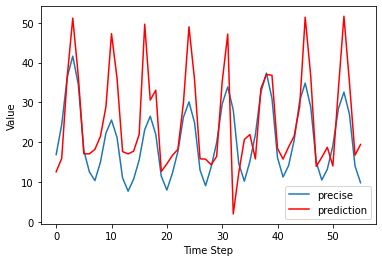

In [171]:
week_t = test[['week_of_year', 'value' ]]
week_t = week_t.reset_index().groupby(['week_of_year'])[['value']].sum().reset_index()
week_t = week_t[['value']]
week_t['value'].to_numpy()
w1 = pred['value'][0] + pred['value'][1] + pred['value'][2] + pred['value'][3] + pred['value'][4] + pred['value'][5] + pred['value'][6]

d1 = pred['value'][0]/w1
d2 = pred['value'][1]/w1
d3 = pred['value'][2]/w1
d4 = pred['value'][3]/w1
d5 = pred['value'][4]/w1
d6 = pred['value'][5]/w1
d7 = pred['value'][6]/w1

d = {'d1': [], 'd2': [],'d3': [],'d4': [],'d5': [],'d6': [],'d7': []}
days = pd.DataFrame(data = d)
days.loc[0] = [d1] + [d2] + [d3] + [d4] + [d5] + [d6] + [d7]
 
d = {'value': []}
days_pred= pd.DataFrame(data = d)
for i in range(7):
    days_pred.loc[i] = pred['value'][i]
for i in range(7):
    for k in range(7):
        days_pred.loc[k+7*(i+1)] = days['d'+str(k+1)][0] * pred['value'][7+i]
plt.plot(days_pred['value'].to_numpy(), label="precise")
plt.plot(test['value'].to_numpy(), 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()   

In [172]:
d = {'w0': [],'w1': [], 'w2': [],'w3': [],'w4': [],'w5': [],'w6': [],'w7': []}
pred_w = pd.DataFrame(data = d)
pred_w.loc[0] = [pred['value'][0] + pred['value'][1] + pred['value'][2] + pred['value'][3] + pred['value'][4] + pred['value'][5] + pred['value'][6]] +[pred['value'][7]] +[pred['value'][8]] +[pred['value'][9]] +[pred['value'][10]] +[pred['value'][11]] +[pred['value'][12]] +[pred['value'][13]]
smape = 0
for i in range(8):
    smape += 2* np.absolute(pred_w['w' + str(i)][0] - week_t['value'][i])/(np.absolute(pred_w['w' + str(i)][0])+ np.absolute(week_t['value'][i]))
smape = smape/8
smape

0.22290811544944536

In [173]:
days_pred['value'].to_numpy()


array([16.91590243, 24.45457724, 36.34957463, 41.62974837, 34.5032631 ,
       17.99183474, 12.59087239, 10.40425414, 15.04097328, 22.35708168,
       25.6046926 , 21.22149376, 11.06601447,  7.7441116 , 10.78954075,
       15.5979652 , 23.18500111, 26.55287639, 22.00736051, 11.47580715,
        8.03088876, 12.25014749, 17.70950023, 26.3236119 , 30.14740477,
       24.98655119, 13.02931547,  9.11804998, 13.78189406, 19.92387897,
       29.61509081, 33.91700703, 28.11084532, 14.65848844, 10.25816211,
       15.18476522, 21.9519482 , 32.62963704, 37.36944911, 30.97227308,
       16.15058892, 11.30234949, 14.16438883, 20.47683487, 30.43701103,
       34.85832017, 28.89101758, 15.06531171, 10.54286125, 13.25060538,
       19.15581826, 28.47343623, 32.60951463, 27.02717905, 14.09340726,
        9.86271245])